# New York City SAT Scores Analysis

This projects analyzes the SAT scores of high schools in New York City. We would like to know what factors effect SAT scores the most. Using data sets containing school level data on a few different factors, we analyze the correlation of these factors with SAT scores.

We use data provided by the City of New York on the following topics (links to original sources provided):

- [SAT Scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)

- [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)

- [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a)

- [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j)

- [School surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8)

## Reading in and cleaning data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


We form a dictionary containing the data sets given by csv files in order to access them more easily. The school surveys are given as txt files; after reading them in we combine them in a single dataframe.

In [2]:
# csv files
data_files = [
    "2012_SAT_Results.csv",
    "2010-2011_Class_Size_-_School-level_detail.csv",
    "2005-2010_Graduation_Outcomes_-_School_Level.csv",
    "2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv"
]

dframes = [
    "sat_scores",
    "class_size",
    "graduation",
    "demographics"
]

data = {}
for f, dframe in zip(data_files, dframes):
    f = "files/{}".format(f)
    data[dframe] = pd.read_csv(f)

# txt files
s1 = pd.read_csv("files/masterfile11_gened_final.txt", sep='\t', encoding='windows-1252')
s2 = pd.read_csv("files/masterfile11_d75_final.txt", sep='\t', encoding='windows-1252')

survey = pd.concat([s1, s2], axis=0)
data['survey'] = survey

- `sat_scores`

In [3]:
pd.set_option('display.max_columns', None)
data['sat_scores'].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


In [4]:
data['sat_scores'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [5]:
# Check for repeated schools
data['sat_scores']['DBN'].duplicated().sum()

0

The `DBN` column (District Borough Number) gives a unique identifier for each school in this data set. We will use this as the basis for identifying schools when we combine the data sets. We will keep this goal in mind and clean out duplicate `DBN` values when we look at the other data sets.

We prefer a single value for the SAT scores, so instead of keeping scores for separate areas we sum them up and create a new column.

In [6]:
cols = data['sat_scores'].columns[3:6]

# Change the score columns to numeric values
for c in cols:
    data['sat_scores'][c] = pd.to_numeric(data['sat_scores'][c], errors='coerce')

data['sat_scores']['total_sat_score'] = data['sat_scores'][cols].sum(axis=1)
data['sat_scores'].drop(cols, axis=1, inplace=True)
data['sat_scores'].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,total_sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,1149.0


****

- `class_size`

In [7]:
data['class_size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


In [8]:
data['class_size'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int64  
 1   BOROUGH                               27611 non-null  object 
 2   SCHOOL CODE                           27611 non-null  object 
 3   SCHOOL NAME                           27611 non-null  object 
 4   GRADE                                 26127 non-null  object 
 5   PROGRAM TYPE                          26127 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  float64
 10  NUMBER OF SECTIONS                    26127 non-null  float64
 11  AVERAGE CLASS S

The `class_size` data set doesn't have the `DBN` column we need to combine our data sets later. Instead we have the `CSD` and `SCHOOL CODE` columns whose combination we can use to get the `DBN` value. We need to pad `CSD` to length two and concatenate with `SCHOOL CODE`.

In [9]:
data['class_size']['DBN'] = data['class_size']['CSD'].astype(str).str.zfill(2) + data['class_size']['SCHOOL CODE']

# Drop the old columns and move DBN to the front
data['class_size'].drop(data['class_size'].columns[:3], axis=1, inplace=True)
first_col = data['class_size'].pop('DBN')
data['class_size'].insert(0, 'DBN', first_col)
data['class_size'].head(3)

,DBN,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,01M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,01M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


In [10]:
# Check for repeated schools
data['class_size']['DBN'].duplicated().sum()

26124

There are a lot of rows with duplicated `DBN` values. After inspecting a few rows we can see that the values in the following columns cause repetitions:

- `GRADE`: Since we are only interested in high school students, we should only keep values 9 to 12.

- `PROGRAM TYPE`: A school may have multiple programs, we will choose `GEN ED` as this is the largest group.

- `CORE COURSE` and `CORE SUBJECT`: We need a class size value that reflects all courses/subjects. Therefore we will take the average across all the courses/subjects for each school.

In [11]:
data['class_size']['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [12]:
# Keep high school students only
data['class_size'] = data['class_size'].groupby('GRADE ').get_group('09-12')

In [13]:
data['class_size']['PROGRAM TYPE'].value_counts()

GEN ED     6513
CTT        2953
SPEC ED    1178
Name: PROGRAM TYPE, dtype: int64

In [14]:
# Keep the largest program type only
data['class_size'] = data['class_size'].groupby('PROGRAM TYPE').get_group('GEN ED')

In [15]:
# Take averages for each school across all numeric columns
data['class_size'] = data['class_size'].groupby('DBN').mean(numeric_only=True)
data['class_size'].reset_index(inplace=True)

In [16]:
# Check for repeated schools
data['class_size'].duplicated().sum()

0

In [17]:
data['class_size'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DBN                                583 non-null    object 
 1   NUMBER OF STUDENTS / SEATS FILLED  583 non-null    float64
 2   NUMBER OF SECTIONS                 583 non-null    float64
 3   AVERAGE CLASS SIZE                 583 non-null    float64
 4   SIZE OF SMALLEST CLASS             583 non-null    float64
 5   SIZE OF LARGEST CLASS              583 non-null    float64
 6   SCHOOLWIDE PUPIL-TEACHER RATIO     0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 32.0+ KB


In [18]:
# Remove the last column containing all null values
col = data['class_size'].columns[6]
data['class_size'].drop(col, axis=1)

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS
0,01M292,88.000000,4.000000,22.564286,18.500000,26.571429
1,01M332,46.000000,2.000000,22.000000,21.000000,23.500000
2,01M378,33.000000,1.000000,33.000000,33.000000,33.000000
3,01M448,105.687500,4.750000,22.231250,18.250000,27.062500
4,01M450,57.600000,2.733333,21.200000,19.400000,22.866667
...,...,...,...,...,...,...
578,32K549,71.066667,3.266667,22.760000,19.866667,25.866667
579,32K552,102.375000,4.312500,23.900000,19.937500,28.000000
580,32K554,66.937500,3.812500,17.793750,14.750000,21.625000
581,32K556,132.333333,5.400000,25.060000,18.333333,30.000000


****

- `graduation`

In [19]:
data['graduation'].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1


In [20]:
data['graduation'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         25096 non-null  object 
 1   DBN                                 25096 non-null  object 
 2   School Name                         25096 non-null  object 
 3   Cohort                              25096 non-null  object 
 4   Total Cohort                        25096 non-null  int64  
 5   Total Grads - n                     25096 non-null  object 
 6   Total Grads - % of cohort           16704 non-null  float64
 7   Total Regents - n                   25096 non-null  object 
 8   Total Regents - % of cohort         16704 non-null  float64
 9   Total Regents - % of grads          16652 non-null  float64
 10  Advanced Regents - n                25096 non-null  object 
 11  Advanced Regents - % of cohort      16704

In this data set, the `Demographic` and `Cohort` columns cause a lot of repetitions in the `DBN` values. We want the latest data from the full cohort, so we choose the corresponding values.

In [21]:
data['graduation']['Demographic'].unique()

array(['Total Cohort', 'Asian', 'Male', 'Black',
       'English Language Learners', 'Hispanic', 'White',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Female'], dtype=object)

In [22]:
# Keep total cohort only
data['graduation'] = data['graduation'].groupby('Demographic').get_group('Total Cohort')

In [23]:
data['graduation']['Cohort'].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

In [24]:
# Keep the latest data only
data['graduation'] = data['graduation'].groupby('Cohort').get_group('2006')

# Check for repeated schools
data['graduation']['DBN'].duplicated().sum()

0

In [25]:
# Remove irrelevant columns
cols = ['Demographic', 'School Name', 'Cohort']
data['graduation'].drop(cols, axis=1)

,DBN,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,01M292,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,01M448,124,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,01M450,90,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,01M509,84,47,56.0,40,47.6,85.1,17,20.2,36.2,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,01M515,193,105,54.4,91,47.2,86.7,69,35.8,65.7,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,32K549,97,74,76.3,59,60.8,79.7,5,5.2,6.8,54,55.7,73.0,15,15.5,20.3,12,12.4,9,9.3
2489,32K552,115,55,47.8,41,35.7,74.5,1,0.9,1.8,40,34.8,72.7,14,12.2,25.5,44,38.3,10,8.7
2495,32K554,43,36,83.7,23,53.5,63.9,5,11.6,13.9,18,41.9,50.0,13,30.2,36.1,5,11.6,2,4.7
2502,32K556,117,65,55.6,28,23.9,43.1,5,4.3,7.7,23,19.7,35.4,37,31.6,56.9,24,20.5,22,18.8


****

- `demographics`

In [26]:
data['demographics'].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


In [27]:
data['demographics'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DBN                10075 non-null  object 
 1   Name               10075 non-null  object 
 2   schoolyear         10075 non-null  int64  
 3   fl_percent         8560 non-null   object 
 4   frl_percent        4482 non-null   float64
 5   total_enrollment   10075 non-null  int64  
 6   prek               4712 non-null   object 
 7   k                  5882 non-null   object 
 8   grade1             5881 non-null   object 
 9   grade2             5851 non-null   object 
 10  grade3             5779 non-null   object 
 11  grade4             5741 non-null   object 
 12  grade5             5777 non-null   object 
 13  grade6             4517 non-null   object 
 14  grade7             4203 non-null   object 
 15  grade8             4085 non-null   object 
 16  grade9             397

We don't need all the values in the `schoolyear` column, so we filter out only the latest year.

In [28]:
data['demographics']['schoolyear'].unique()

array([20052006, 20062007, 20072008, 20082009, 20092010, 20102011,
       20112012])

In [29]:
# Keep the latest year only
data['demographics'] = data['demographics'].groupby('schoolyear').get_group(20112012)

# Check for repeated schools
data['demographics']['DBN'].duplicated().sum()

0

In [30]:
data['demographics'].columns

Index(['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_per', 'hispanic_num', 'hispanic_per', 'white_num', 'white_per',
       'male_num', 'male_per', 'female_num', 'female_per'],
      dtype='object')

In [31]:
# Remove columns that are irrelevant
cols = data['demographics'].columns[6:20]
data['demographics'].drop(cols, axis=1, inplace=True)

In [32]:
data['demographics'].drop(['Name', 'schoolyear'], axis=1, inplace=True)

****

- `survey`

In [33]:
data['survey'].head(3)

dbn    bn                 schoolname  d75 studentssurveyed  highschool  \
0  01M015  M015  P.S. 015 Roberto Clemente    0               No         0.0   
1  01M019  M019        P.S. 019 Asher Levy    0               No         0.0   
2  01M020  M020       P.S. 020 Anna Silver    0               No         0.0   

          schooltype  rr_s  rr_t  rr_p  N_s   N_t    N_p  nr_s  nr_t  nr_p  \
0  Elementary School   NaN    88    60  NaN  22.0   90.0     0    25   150   
1  Elementary School   NaN   100    60  NaN  34.0  161.0     0    33   269   
2  Elementary School   NaN    88    73  NaN  42.0  367.0     0    48   505   

   saf_p_11  com_p_11  eng_p_11  aca_p_11  saf_t_11  com_t_11  eng_t_11  \
0       8.5       7.6       7.5       7.8       7.5       7.8       7.6   
1       8.4       7.6       7.6       7.8       8.6       8.5       8.9   
2       8.9       8.3       8.3       8.6       7.6       6.3       6.8   

   aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  saf_tot_11  com_tot_11  \
0       7.9       NaN       NaN       NaN       NaN         8.0         7.7   
1       9.1       NaN       NaN       NaN       NaN         8.5         8.1   
2       7.5       NaN       NaN       NaN       NaN         8.2         7.3   

   eng_tot_11  aca_tot_11  p_q2h  p_q7a  p_q7b  p_q7c  p_q7d  p_q8a  p_q8b  \
0         7.5         7.9    8.0    8.2    8.3    7.5    7.9    6.8    8.7   
1         8.2         8.4    7.7    7.9    8.0    7.3    7.7    6.5    8.8   
2         7.5         8.0    8.1    8.8    8.9    8.5    8.4    7.6    9.2   

   p_q8c  p_q8d  p_q8e  p_q8f  p_q2b  p_q2d  p_q2e  p_q2f  p_q2g  p_q3a  \
0    9.7    8.7    9.9    9.9    7.7    8.3    7.9    8.1    7.5    7.3   
1    9.4    8.7   10.0    9.9    7.5    8.2    7.9    8.0    7.2    7.0   
2    9.4    9.2    9.8    9.7    8.4    8.8    8.5    8.3    8.0    7.6   

   p_q3b  p_q4b  p_q4c  p_q11c  p_q2a  p_q2c  p_q3c  p_q6a  p_q6b  p_q11d  \
0    6.7    7.6    7.9     7.5    8.0    7.4    8.7    6.3    6.6     7.6   
1    6.9    8.0    8.4     7.4    7.6    7.1    9.0    6.4    6.5     7.6   
2    7.3    8.6    8.7     8.4    8.8    8.2    8.8    7.9    6.8     8.5   

   p_q11e  p_q5  p_q4a  p_q4d  p_q4e  p_q11a  p_q11b  p_q11f  p_q1  p_q3d  \
0     7.6   7.4    7.8    7.4    NaN     8.3     7.5     7.7   NaN    NaN   
1     7.8   8.6    7.7    7.8    NaN     8.3     7.6     7.7   NaN    NaN   
2     8.5   8.7    8.6    8.5    NaN     8.9     8.4     8.6   NaN    NaN   

   p_q9  p_q10  p_q12aa  p_q12ab  p_q12ac  p_q12ad  p_q12ba  p_q12bb  p_q12bc  \
0   NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1   NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2   NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   p_q12bd  p_q1_1  p_q1_2  p_q1_3  p_q1_4  p_q1_5  p_q1_6  p_q1_7  p_q1_8  \
0      NaN     7.0     9.0    14.0    19.0    14.0    19.0    16.0     0.0   
1      NaN    11.0    16.0    14.0    15.0    16.0    11.0    16.0     1.0   
2      NaN    10.0    18.0    20.0    11.0    14.0    12.0    17.0     0.0   

   p_q1_9  p_q1_10  p_q1_11  p_q1_12  p_q1_13  p_q1_14  p_q2a_1  p_q2a_2  \
0     1.0      0.0      0.0      0.0      0.0      0.0     47.0     48.0   
1     0.0      1.0      0.0      0.0      0.0      0.0     44.0     43.0   
2     0.0      0.0      0.0      0.0      0.0      0.0     64.0     36.0   

   p_q2a_3  p_q2a_4  p_q2a_5  p_q2b_1  p_q2b_2  p_q2b_3  p_q2b_4  p_q2b_5  \
0      6.0      0.0      0.0     40.0     50.0      9.0      0.0      1.0   
1      9.0      4.0      0.0     42.0     42.0     12.0      2.0      1.0   
2      0.0      0.0      0.0     54.0     45.0      1.0      0.0      0.0   

   p_q2c_1  p_q2c_2  p_q2c_3  p_q2c_4  p_q2c_5  p_q2d_1  p_q2d_2  p_q2d_3  \
0     38.0     51.0      8.0      3.0      0.0     53.0     43.0      1.0   
1     39.0     35.0     19.0      4.0      2.0     50.0     46.0      3.0   
2     50.0     48.0      3.0      0.0  

In [34]:
data['survey'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 55
Columns: 2773 entries, dbn to s_q14_11
dtypes: float64(2762), int64(6), object(5)
memory usage: 36.0+ MB


The `survey` data set contains a lot of columns most of which we do not need. After reading the data dictionary (provided on [the original source page](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8)), we focus on the following columns.

In [35]:
cols = ["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

data['survey'] = data['survey'].copy()[cols]

# Make dbn uppercase to make it conistent with other data sets
data['survey'].rename({'dbn':'DBN'}, axis=1, inplace=True)
data['survey'].head(3)

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0


In [36]:
# Check for repeated schools
data['survey']['DBN'].duplicated().sum()

0

## Combining the data sets

Now that we have gotten rid of duplicates, we can combine our data sets using the `DBN` values. We will take the `sat_scores` as the starting point and consider the missing `DBN` values from `sat_scores` in each data set during our merge operations.

In [37]:
# View the number of schools in our basis data set
s = set(data['sat_scores']['DBN'])
len(s)


478

In [38]:
dframes = [
    "class_size",
    "graduation",
    "demographics",
    "survey"
]

for d in dframes:
    t = set(data[d]['DBN'])
    print("Difference of {} from sat_scores: {}".format(d, len(s - t)))

Difference of class_size from sat_scores: 44
Difference of graduation from sat_scores: 89
Difference of demographics from sat_scores: 28
Difference of survey from sat_scores: 8


Since the `DBN` values of `graduation` differs quite a lot from `sat_scores`, we will take the left join for this data set in order not to lose too much from `sat_scores`. We will take the inner join with the remaining three data sets since they are relatively more important for our analysis and since their difference from `DBN` is less significant (less than 10% of the number of `DBN` values).

In [39]:
combined = data['sat_scores']

combined = combined.merge(data["graduation"], on='DBN', how='left')

dframes = [
    "class_size",
    "demographics",
    "survey"
]

for d in dframes:
    combined = combined.merge(data[d], on='DBN', how='inner')

We fill in the missing values with the mean of the column where applicable, and with 0 for the remaining ones.

In [40]:
combined.fillna(combined.mean(numeric_only=True), inplace=True)
combined.fillna(0, inplace=True)

In [41]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 433
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   DBN                                 434 non-null    object 
 1   SCHOOL NAME                         434 non-null    object 
 2   Num of SAT Test Takers              434 non-null    object 
 3   total_sat_score                     434 non-null    float64
 4   Demographic                         434 non-null    object 
 5   School Name                         434 non-null    object 
 6   Cohort                              434 non-null    object 
 7   Total Cohort                        434 non-null    float64
 8   Total Grads - n                     434 non-null    object 
 9   Total Grads - % of cohort           434 non-null    float64
 10  Total Regents - n                   434 non-null    object 
 11  Total Regents - % of cohort         434 non-n

## Analyzing correlations

We start by looking at the correlations of the columns in our dataframe `combined` with the column `total_sat_score`.

In [42]:
correlations = combined.corr(numeric_only=True)['total_sat_score']

# Focus on correlation coefficients with absolute value larger than 0.25
correlations[correlations.apply(abs) > 0.25].drop('total_sat_score').sort_values(key=abs, ascending=False)

Advanced Regents - % of cohort       0.387997
frl_percent                         -0.384805
Advanced Regents - % of grads        0.373391
Total Regents - % of cohort          0.361793
SIZE OF LARGEST CLASS                0.359179
N_s                                  0.336157
Total Grads - % of cohort            0.333000
N_p                                  0.325224
AVERAGE CLASS SIZE                   0.319012
total_enrollment                     0.303323
female_num                           0.300168
NUMBER OF STUDENTS / SEATS FILLED    0.297411
Still Enrolled - % of cohort        -0.292883
white_per                            0.291547
asian_num                            0.290182
male_num                             0.287464
N_t                                  0.285841
NUMBER OF SECTIONS                   0.285791
Total Regents - % of grads           0.273905
Local - % of grads                  -0.273902
white_num                            0.271754
Dropped Out - % of cohort         

From the correlations table we can see a few topics standing out; next we will investigate their relation with SAT scores more closely.

## Graduation

Students in New York can have one of three types of diplomas. Given in an order of increasing number of required assessments, these are a local diploma, a Regents diploma and an advanced Regents diploma. More info can be found on the [website](http://www.nysed.gov/curriculum-instruction/diploma-types) of New York State Education Department.

We see that graduation percentages appear high up on the correlation table, in particular, advanced Regents percentage has the highest correlation coefficient value with `sat_score`. We visualize this relation in the following plots.

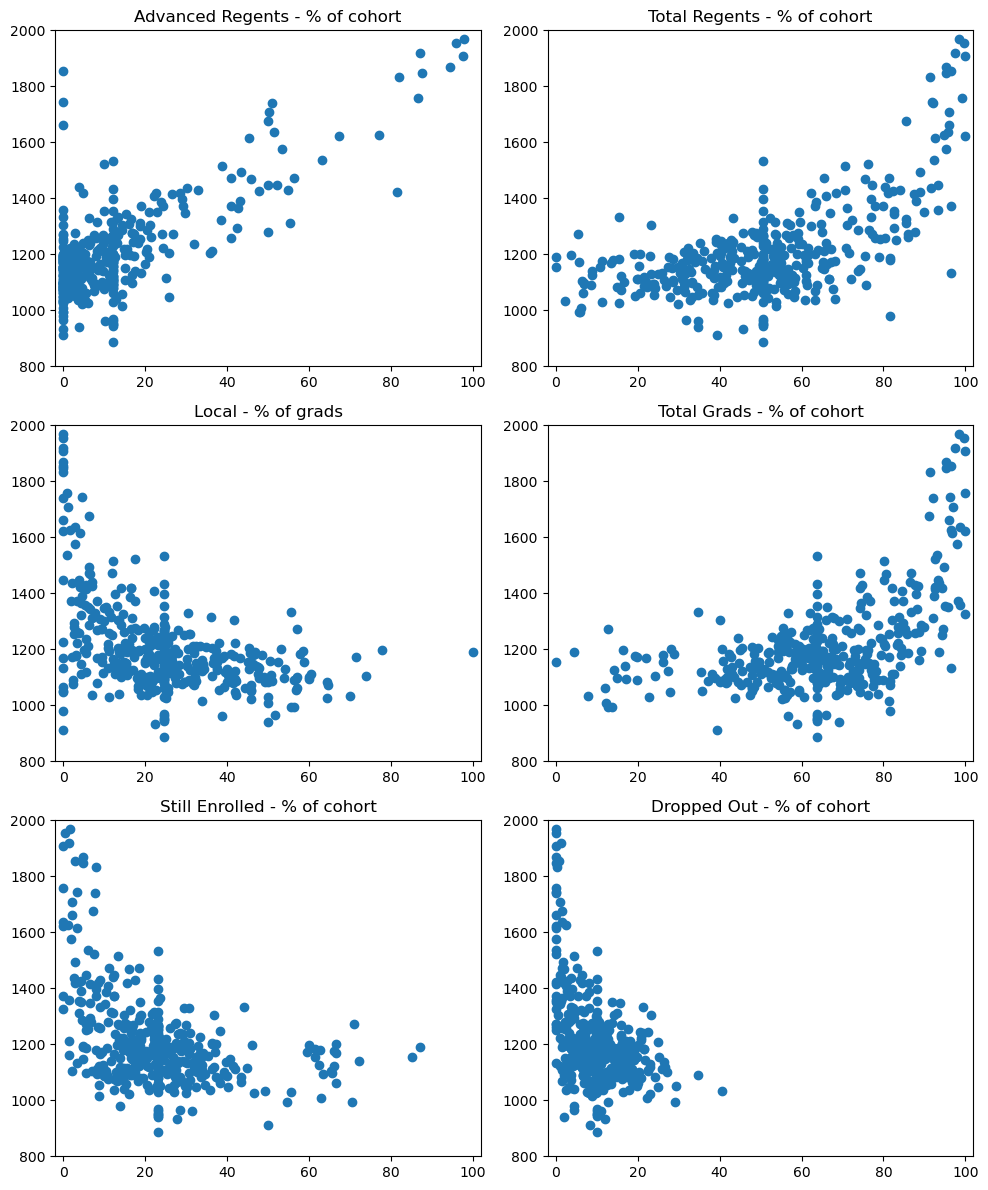

In [43]:
cols = [
    "Advanced Regents - % of cohort",
    "Total Regents - % of cohort",
    "Local - % of grads",
    "Total Grads - % of cohort",
    "Still Enrolled - % of cohort",
    "Dropped Out - % of cohort"
]

plt.figure(figsize=(10, 12))

for c, i in zip(cols, range(1, 7)):
    plt.subplot(3, 2, i)
    plt.scatter(combined[c], combined['total_sat_score'])
    plt.title(c)
    plt.xlim([-2,102])
    plt.ylim([800,2000])

plt.tight_layout()
plt.show()

The correlation with SAT scores seems to get stronger as the diploma gets more advanced; we see that the advanced Regents percentage has a clear correlation, yet this is not the case for local diplomas.

Percentage of students not graduating in their cohort seems to be loosely negatively correlated with SAT scores but even this weak correlation only pertains to the lower half of percentage values.

## Demographics

The `frl_percent` column from the `demographics` data set is high up in the corelations list.

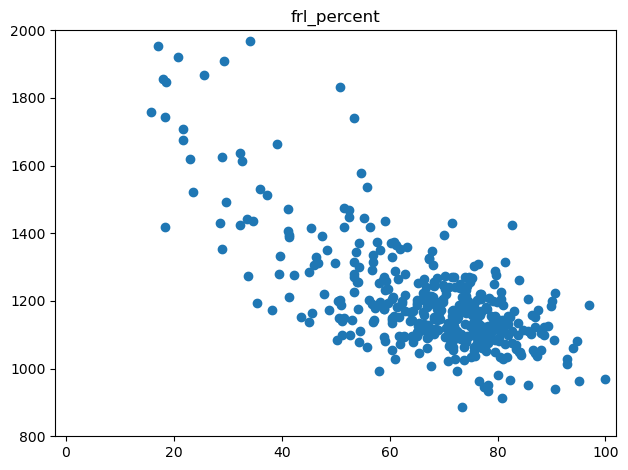

In [44]:
plt.figure()
plt.scatter(combined['frl_percent'], combined['total_sat_score'])
plt.xlim([-2,102])
plt.ylim([800,2000])
plt.title('frl_percent')
plt.tight_layout()
plt.show()

The percentage of students that natively speak a foreign language has a clear negative correlation with SAT scores. This could be due to the difficulties for a student to learn English and take other high school courses in English at the same time.

*Note: We assume `frl_percent` means percentage of students whose native language is not English -- unfortunately, a description of this column is not provided in the data dictionary or anywhere else on the [source page](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j).*

One column that has a positive correlation with SAT scores is the total number of enrolled students. However, even though it appears high up in the correlations table, the scatter plot does not suggest a strong correlation.

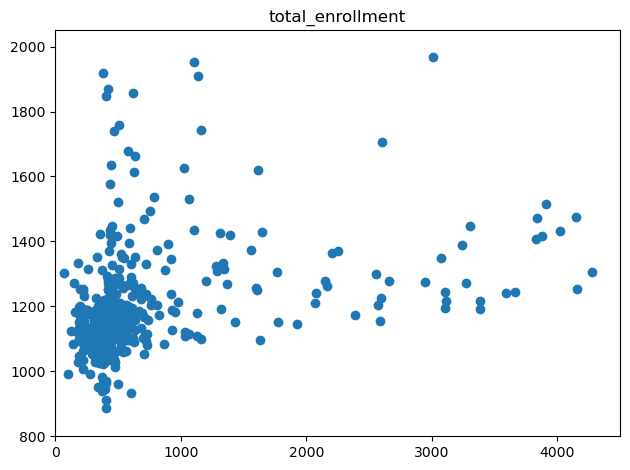

In [45]:
plt.figure()
plt.scatter(combined['total_enrollment'], combined['total_sat_score'])
plt.xlim([-2,4500])
plt.ylim([800,2050])
plt.title('total_enrollment')
plt.tight_layout()
plt.show()

The number of female students, asian students etc. also have relatively large correlation coefficients. In order not to have bias towards the total enrollment overall, we will look at percentages of these different backgrounds and not the number of student in each group.

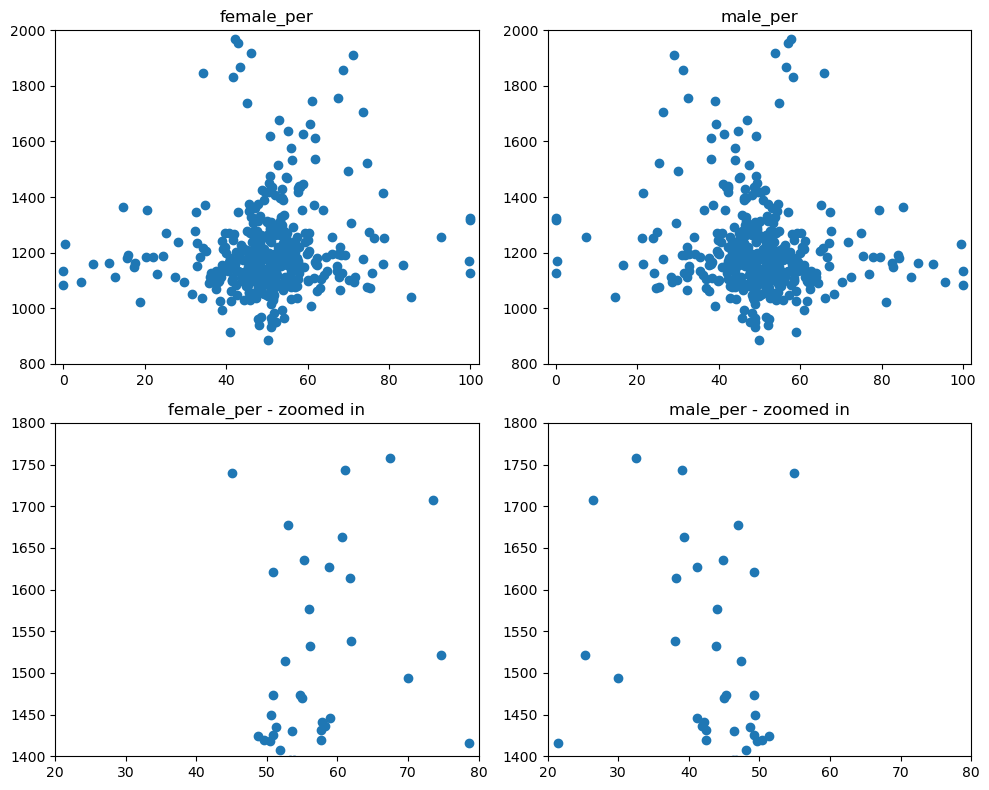

In [46]:
cols = [
    "female_per",
    "male_per"
]

plt.figure(figsize=(10,8))
for c, i in zip(cols, range(1, 3)):
    plt.subplot(2, 2, i)
    plt.scatter(combined[c], combined['total_sat_score'])
    plt.xlim([-2,102])
    plt.ylim([800,2000])
    plt.title(c)
for c, i in zip(cols, range(3, 5)):
    plt.subplot(2, 2, i)
    plt.scatter(combined[c], combined['total_sat_score'])
    plt.xlim([20,80])
    plt.ylim([1400,1800])
    plt.title("{} - zoomed in".format(c))
plt.tight_layout()
plt.show()
    

The plots above do not favor male or female student percentages in a dramatic way overall but it seems schools with a larger female percentage do better around scores 1400-1800.

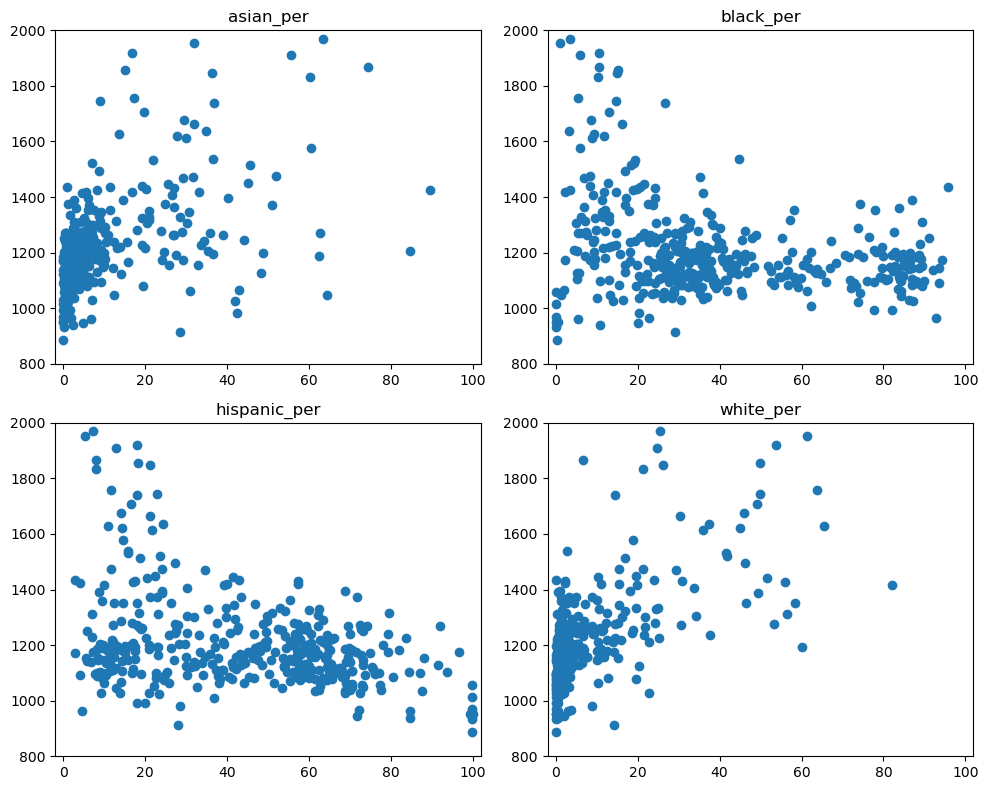

In [47]:
cols = [
    "asian_per",
    "black_per",
    "hispanic_per",
    "white_per"
]

plt.figure(figsize=(10, 8))
for c, i in zip(cols, range(1, 5)):
    plt.subplot(2, 2, i)
    plt.scatter(combined[c], combined['total_sat_score'])
    plt.title(c)
    plt.title(c)
    plt.xlim([-2,102])
    plt.ylim([800,2000])
plt.tight_layout()
plt.show()

The plots above do not suggest a clear correlation between SAT scores and percentages of students from any of the groups above. The asian student percentage and the white student percentage plots have more pronounced positive correlations relative to the other groups, at least in some areas in the 20%-50% interval. On the other hand, schools with black or hispanic student percentages above 25% seem to be stuck with scores under around 1500. This could be due to a lack of funding for schools in some regions of the city.

## Class size

Next we look at the columns from `class_size` that have correlation coefficients larger than 0.25 with `total_sat_score`.

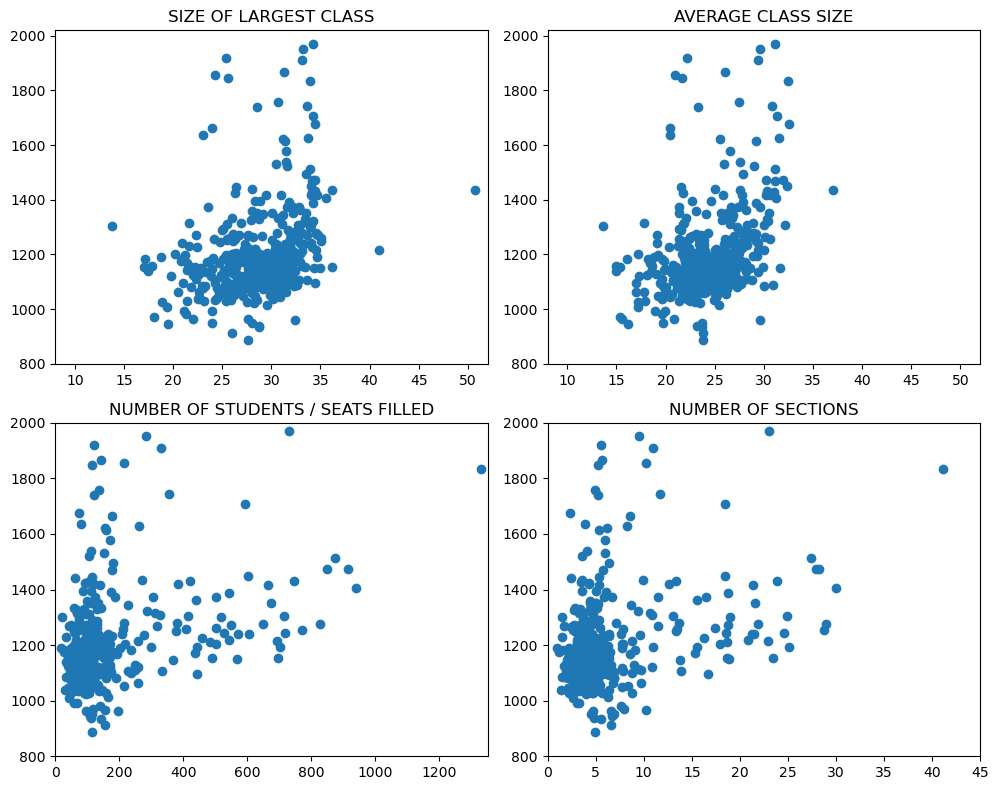

In [48]:
cols = [
    "SIZE OF LARGEST CLASS",
    "AVERAGE CLASS SIZE",
    "NUMBER OF STUDENTS / SEATS FILLED",
    "NUMBER OF SECTIONS"
]

plt.figure(figsize=(10,8))

for c, i in zip(cols[:2], range(1, 3)):
    plt.subplot(2, 2, i)
    plt.scatter(combined[c], combined['total_sat_score'])
    plt.title(c)
    plt.xlim([8,52])
    plt.ylim([800,2020])
plt.subplot(2, 2, 3)
plt.scatter(combined[cols[2]], combined['total_sat_score'])
plt.title(cols[2])
plt.xlim([0,1350])
plt.ylim([800,2000])
plt.subplot(2, 2, 4)
plt.scatter(combined[cols[3]], combined['total_sat_score'])
plt.title(cols[3])
plt.xlim([0,45])
plt.ylim([800,2000])
plt.tight_layout()
plt.show()

One might expect that the scores would decrease as the class size increases, since that would mean each student gets less personal attention from the teacher, but this doesn't seem to be the case on the plots above. Schools with largest class of size less than 25 or average class size less than 20 seem to be stuck under scores around 1400; the best scores belong to class sizes with average and maximum in the interval 20-35. There is no clear correlation outside of this interval.

Number of students/seats filled shows some loose positive correlation with SAT scores which makes sense as this could mean students are more attentive during class. Also, for number of sections in the interval 10-30, schools with more sections seem to do slightly better.

## School surveys

Finally, we take a closer look at the columns from the `survey` dataframe that have the largest correlation coefficients with `total_sat_score`.

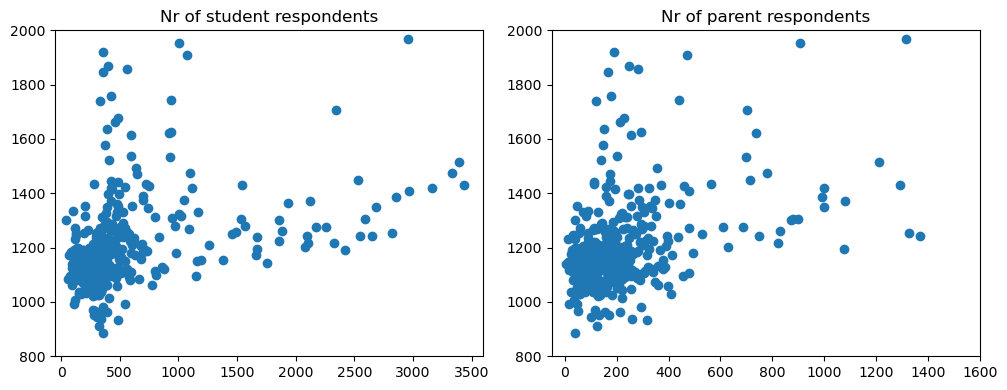

In [49]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(combined['N_s'], combined['total_sat_score'])
plt.title("Nr of student respondents")
plt.xlim([-50, 3600])
plt.ylim([800, 2000])
plt.subplot(1, 2, 2)
plt.scatter(combined['N_p'], combined['total_sat_score'])
plt.title("Nr of parent respondents")
plt.xlim([-50,1600])
plt.ylim([800,2000])
plt.tight_layout()
plt.show()

The plots above suggest a loose correlation if we restrict ourselves to SAT scores in the interval 1000-1500 **and** respondent numbers larger than 1000 for students and larger than 600 for parents. This is not a meaningful correlation overall and these numbers are not necessary lower bounds either since we can see numerous successful schools with lower respondent numbers.

## Summary

We used a few data sets in order to understand which factors are closely related to the SAT scores of high schools in NYC. We looked at the correlation coefficients, and inspected the columns with large coefficients more closely using scatter plots. One point to note  is that all the coefficients are in the interval [-0.4, 0.4], so we don't really have that strong correlation values.

Here are some observations we made in our analysis:

- Percentage of students graduating with advanced diplomas, specifically Regents or Advanced Regents diplomas, is a good indication for better average SAT scores

- Students whose native language is not English seem to have some difficulty with SATs

- Schools with more female students have a slight edge in the score interval 1400-1800

- Black and hispanic students seem to be at a disadvantage in the SATs; schools where black or hispanic student percentage is larger than 25 all have average SAT scores lower than 1500

- Ideal average class size for better SAT scores is in the interval 20-35